## Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
FOLDER_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/'

MODELS_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/Models'

GOOGLE_FOLDER_PATH = os.path.join('drive', 'My Drive', FOLDER_PATH)
GOOGLE_MODELS_PATH = os.path.join('drive', 'My Drive', MODELS_PATH)
 
print(os.listdir(GOOGLE_MODELS_PATH))
print(os.listdir(GOOGLE_FOLDER_PATH))


['HOG-MLP.ipynb', 'SVM_Model.py', '__pycache__', 'HOG-BoW-SVM.ipynb', 'MLP.ipynb', 'HOG-SVM.ipynb', 'SVC_Alone.ipynb', 'CNN.ipynb', 'SIFT-BoW-SVM.ipynb']
['Models', 'test_function.ipynb', 'CW_Dataset', 'svc_alone.joblib', 'svc_hog.joblib', 'variables', 'assets', 'knn.joblib', 'svc_sift.joblib', 'cnn_arc1.h5', 'kmeans.joblib', 'hog_mlp_arc1.h5', 'mlp_arc1.h5', 'mlp_arc2.h5', 'cnn_arc2.h5']


## Reading the dataset

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
CODE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'Code')
sys.path.append(CODE_PATH)


In [ ]:
import cv2
from skimage import img_as_ubyte, io, color
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'CW_Dataset')

def load_images_from_folder(path, label_list=None):
  images = []
  labels = []
  img_labels = {}
  if label_list is None:
    folder_names = [folder for folder in sorted(os.listdir(path)) if not folder.startswith('README')]
    print('folder_names', folder_names)
  else:
    folder_names = [folder for folder in sorted(os.listdir(path)) if folder in label_list.endswith('.jpg')]  
  
  for folder in folder_names:
    file_names = [file for file in sorted(os.listdir(os.path.join(path, folder)))]
    print('file_names', file_names)
    for file in file_names:

      if file.endswith('.txt'):
        labels_rd = np.loadtxt(os.path.join(path, folder, file), delimiter=' ', usecols=(1)).tolist()

        [labels.append(label) for label in labels_rd]
        print(labels[:5], len(labels))
        
        print(folder, file, labels)
      else:
        rep_str = '(1)'
        if rep_str not in file:
          images.append(io.imread(os.path.join(path, folder, file)))
        print(folder, file)
  return images, labels



X, y = load_images_from_folder(DATASET_PATH)



Se han truncado las últimas 5000 líneas del flujo de salida.
train train_07288_aligned.jpg
train train_07289_aligned.jpg
train train_07290_aligned.jpg
train train_07291_aligned.jpg
train train_07292_aligned.jpg
train train_07293_aligned.jpg
train train_07294_aligned.jpg
train train_07295_aligned.jpg
train train_07296_aligned.jpg
train train_07297_aligned.jpg
train train_07298_aligned.jpg
train train_07299_aligned.jpg
train train_07300_aligned.jpg
train train_07301_aligned.jpg
train train_07302_aligned.jpg
train train_07303_aligned (1).jpg
train train_07303_aligned.jpg
train train_07304_aligned.jpg
train train_07305_aligned.jpg
train train_07306_aligned.jpg
train train_07307_aligned.jpg
train train_07308_aligned.jpg
train train_07309_aligned.jpg
train train_07310_aligned.jpg
train train_07311_aligned.jpg
train train_07312_aligned.jpg
train train_07313_aligned.jpg
train train_07314_aligned.jpg
train train_07315_aligned.jpg
train train_07316_aligned.jpg
train train_07317_aligned.jpg
train

## Introduction

The RAF dataset contains 15339 aligned facial color images containing expressions and labels for the images, the labels are encoded using ordinal encoding for every emotion. 

### Data
Images are named in the format of "train_XXXXX_aligned.jpg" / "test_XXXX_aligned.jpg".
Images are first roughly aligned using similarity transformation according to the two eye locations and the center of mouth.

Images are then resized to 100*100

#### Label explanation:
1. Surprise<p>
2. Fear<p>
3. Disgust<p>
4. Happiness<p>
5. Sadness
6. Anger
7. Neutral





## Data Preprocessing

Data was preprocessed by converting it to grayscale, at first using colors channels was used, however it was taking to long to train some models such as the SVM model. Using colors the main problem was the curse of dimentionality, even trying to use much less columns. Based on the dataset using color would not give much insight, as to recornise emotions, color probably has less importance. Thus, converting to grayscale reduced the training time. 




(15339, 100, 100, 3) (15339,)


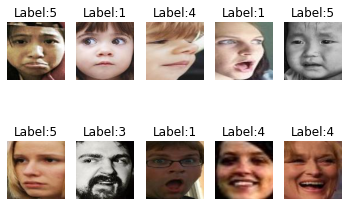

In [ ]:
#from sklearn.preprocessing import

def convert_to_numpy(images, labels):
  """Converts the images to a numpy array""" 
  
  data = np.asarray(images)
  lb = np.asarray(labels)
  return data, lb

X, y = convert_to_numpy(X, y)


X = X / 255.
y = y.astype(int)

print(X.shape, y.shape)


#def print_images()
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
ax = axs.ravel()
for i in range(10):
  ax[i].imshow(X[i, :, :, :])
  ax[i].set_title(f'Label:{y[i]}')
  ax[i].set_axis_off()
plt.show()



In [ ]:
from skimage import img_as_ubyte, color
from skimage.transform import rescale, resize


X = img_as_ubyte(color.rgb2gray(X))

X.shape



(15339, 100, 100)

In [ ]:
print(X.dtype, y.dtype)
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


uint8 int64
TRAIN: [ 2191  2206  2217 ... 15336 15337 15338] TEST: [   0    1    2 ... 3484 3511 3514]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 2191  2206  2217 ... 13414 13415 13416]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 5171  5172  5173 ... 14055 14056 14057]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 6762  6763  6767 ... 14696 14697 14698]
TRAIN: [    0     1     2 ... 14696 14697 14698] TEST: [ 9498  9499  9500 ... 15336 15337 15338]


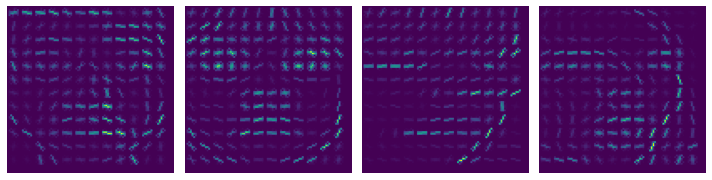

(12272, 1152) (12272, 100, 100)


In [ ]:
from skimage.feature import hog

HOG_des_list = []
HOG_images_list = []

fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)


for i in range(len(X_train)):
    HOG_des, HOG_image = hog(X_train[i, :, :], orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)  
 
 
    # Show results for first 4 images
    if i<4:   
        ax[i].imshow(HOG_image)
        ax[i].set_axis_off()

    if HOG_des is not None:
      HOG_des_list.append(HOG_des)  
      HOG_images_list.append(HOG_image)   
     
      
fig.tight_layout()
plt.show()

HOG_des_list = np.asarray(HOG_des_list)
HOG_images_list = np.asarray(HOG_images_list)


print(HOG_des_list.shape, HOG_images_list.shape)



In [ ]:
X_train = HOG_des_list
#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
#                       anti_aliasing=True)

print('X_train shape =', X_train.shape)
print('y_train shape =', y_train.shape)



### Multilayer Perceptron

In [ ]:
### Multi-layer Perceptron
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.optimizers import SGD, Nadam, Adam, RMSprop, Adagrad, Adadelta, Adamax
from keras.optimizers import RMSprop
from keras import datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import expon
from sklearn.utils.fixes import loguniform
from scipy.stats import randint, loguniform, poisson, boltzmann
from sklearn.preprocessing import OneHotEncoder

In [ ]:
classes = np.unique(y_train)
classes.shape
classes

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)
print(y_train.shape)

(12272, 8)


In [ ]:

metrics = [tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]
model = Sequential()
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(80, activation='selu',))
model.add(Dropout(0.5))
model.add(Dense(100, activation='elu', kernel_initializer='glorot_normal'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softplus', kernel_initializer='glorot_normal'))
model.add(Dense(8, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.0003), metrics=metrics)

model.fit(X_train, y_train, epochs=400, batch_size=86)

model.summary()

Epoch 1/400
143/143 [==============================] - 2s 4ms/step - loss: 2.4888 - categorical_accuracy: 0.1141 - auc: 0.4919 - precision: 0.0806
Epoch 2/400
143/143 [==============================] - 1s 4ms/step - loss: 1.9739 - categorical_accuracy: 0.3237 - auc: 0.5215 - precision: 0.4046
Epoch 3/400
143/143 [==============================] - 1s 4ms/step - loss: 1.8488 - categorical_accuracy: 0.3725 - auc: 0.5251 - precision: 0.3888
Epoch 4/400
143/143 [==============================] - 1s 4ms/step - loss: 1.7887 - categorical_accuracy: 0.3777 - auc: 0.5223 - precision: 0.3647
Epoch 5/400
143/143 [==============================] - 0s 3ms/step - loss: 1.7660 - categorical_accuracy: 0.3628 - auc: 0.5208 - precision: 0.3821
Epoch 6/400
143/143 [==============================] - 1s 4ms/step - loss: 1.7468 - categorical_accuracy: 0.3640 - auc: 0.5212 - precision: 0.3938
Epoch 7/400
143/143 [==============================] - 1s 4ms/step - loss: 1.7304 - categorical_accuracy: 0.3679 - auc

In [ ]:
model.save(GOOGLE_FOLDER_PATH + 'hog_mlp_arc1.h5')

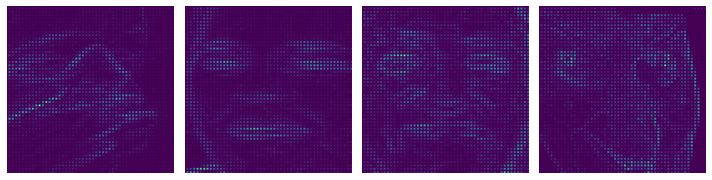

In [ ]:
from sklearn.utils import shuffle
from sklearn import metrics
#{'C': 601.0389754773887, 'gamma': 0.00044779271665273756, 'kernel': 'sigmoid'}
#{'C': 93.93743056153981, 'gamma': 0.00037009106769118395, 'kernel': 'sigmoid'}
#predicted = rndSearch.predict(X_test[:subset_size, :])
HOG_des_list = []
HOG_images_list = []


fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)
for i in range(len(X_test)):
    HOG_des, HOG_image = hog(X_test[i, :, :], orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)  
    
    # Show results for first 4 images
    if i<4:   
        ax[i].imshow(HOG_image)
        ax[i].set_axis_off()

    if HOG_des is not None:
      HOG_des_list.append(HOG_des)  
      HOG_images_list.append(HOG_image)   
       
      
fig.tight_layout()
plt.show()

HOG_des_list = np.asarray(HOG_des_list)
HOG_images_list = np.asarray(HOG_images_list)




In [ ]:
X_test = HOG_des_list
y_test = to_categorical(y_test, num_classes=8)
print(y_test.shape)

In [ ]:
y_pred = model.predict(X_test)
y_pred[0, :]

array([9.1104403e-06, 4.3341753e-01, 3.3227392e-03, 2.3055363e-02,
       2.4143963e-04, 3.7518514e-03, 1.9711610e-03, 5.3423083e-01],
      dtype=float32)

In [ ]:

y_pred = [np.argmax(y_p) for y_p in y_pred[:, :]]

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
probas = model.predict_proba(X_test)

#precision_recall_curve(y_test, [np.argmax(prob) for prob in probas[:, :]])
precision_score = precision_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'precision score: {precision_score}')
print(f'accuracy score: {accuracy_score}')
print(f'f1 score: {f1_score}')
print(f'recall score: {recall_score}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


precision score: 0.5297943144708029
accuracy score: 0.5852624714704924
f1 score: 0.5522995451191458
recall score: 0.5852624714704924


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.utils import shuffle
X_test, y_test, y_pred = shuffle(X_test,  y_test, y_pred)
X_test_img = X_test.reshape(-1, 100, 100)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test_img[i, :, :], cmap='gray')
    ax[i].set_title(f'Label: {y_test[i]}\n Prediction: {y_pred[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

Confusion matrix:
[[205   0   3  39  14   2  60]
 [ 11  16   2  18  10   8   6]
 [ 12   0  32  34  30  14  53]
 [ 29   1  15 982  51  10 104]
 [ 19   0  13  81 226  11 142]
 [  9   2  10  33  21  78  21]
 [ 44   0  17  68  75   3 433]]


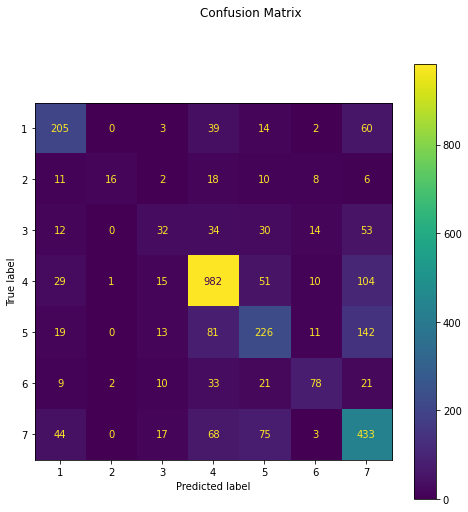

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
#cm = metrics.plot_confusion_matrix(rndSearch, X_train[:sub_size, :], y_test[:sub_size], values_format = 'd', ax=ax)
cm = metrics.plot_confusion_matrix(svg, X_test, y_test, values_format = 'd', ax=ax)
cm.figure_.suptitle("Confusion Matrix")

print(f'Confusion matrix:\n{cm.confusion_matrix}')



In [ ]:
if 7 in y_train[:2500]:
  print(True)
else:
  print(False)


True


In [ ]:
from joblib import dump, load


SAVE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'svc_hog.joblib')
dump(svg, SAVE_PATH) 
load = load(SAVE_PATH)
